In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.13021876, -0.2829983 ,  0.74966857, -0.54935716, -0.31633156,
         0.16493585,  0.17216599,  0.48780559, -1.00629325,  0.61149581],
       [-0.72713252, -1.11543341, -1.50388844,  2.25686052,  2.02377276,
         0.03346105, -0.29585111,  1.07095551, -0.35322874,  0.23570608]])

In [4]:
test_Features[:2]

array([[ 0.31761704,  0.31755527,  0.02091267, -0.93719504, -0.69368017,
        -0.9042767 , -1.15736   , -1.16301206, -0.66948055, -0.4803909 ],
       [-0.869162  , -0.41885123, -0.80179434,  0.13168397,  0.35963825,
        -0.31855607, -0.51488577,  0.5628624 ,  0.04265012, -1.01750578]])

In [5]:
train_Label[:4]

array([1, 0, 0, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20*6,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=20*5,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=20*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=20*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=20*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=20,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(10, activation='tanh'))

In [24]:
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 120)           240       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 120)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 100)           12100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 80)            8080      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 80)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 60)            4860      
__________

In [26]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [27]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 4s 360us/step - loss: 0.6216 - acc: 0.6827 - val_loss: 0.4938 - val_acc: 0.7697
Epoch 2/30
10194/10194 [==============================] - 2s 234us/step - loss: 0.4515 - acc: 0.7907 - val_loss: 0.4006 - val_acc: 0.8176
Epoch 3/30
10194/10194 [==============================] - 2s 232us/step - loss: 0.4060 - acc: 0.8209 - val_loss: 0.3756 - val_acc: 0.8337
Epoch 4/30
10194/10194 [==============================] - 2s 233us/step - loss: 0.3822 - acc: 0.8376 - val_loss: 0.3546 - val_acc: 0.8497
Epoch 5/30
10194/10194 [==============================] - 2s 237us/step - loss: 0.3626 - acc: 0.8501 - val_loss: 0.3413 - val_acc: 0.8537
Epoch 6/30
10194/10194 [==============================] - 2s 240us/step - loss: 0.3528 - acc: 0.8532 - val_loss: 0.3291 - val_acc: 0.8584
Epoch 7/30
10194/10194 [==============================] - 3s 260us/step - loss: 0.3430 - acc: 0.8590 - val_loss: 0.3240 - v

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

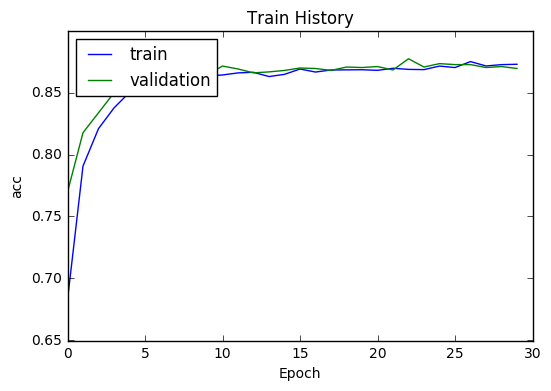

In [29]:
show_train_history(train_history,'acc','val_acc')

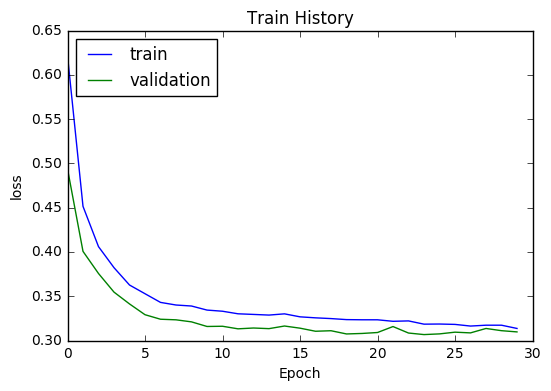

In [30]:
show_train_history(train_history,'loss','val_loss')

In [31]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 184us/step


In [32]:
scores[1]

0.8561414688545483